Titanic Dataset using RandomForest

Comparing metrics used in random forest like Accuracy, cross validation score (CV), and Out of Bag score (OOB)

- Accuracy: how well it performs on test set

- CV: how well it generalizes across different folds of dataset 

- OOB: how well it performs on OOB samples (training samples that are not included in the bootstrap sample)

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [27]:
titanic = pd.read_csv('data/train.csv')    # import data from csv file
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


- remove passengerid, name, ticket number, cabin number using iloc (choose specific index that I want)

In [28]:
# create own dataframe by selecting specific index and make a copy of it
titanic_baseline = titanic.iloc[:, [1,2,4,5,6,7,9,11]].copy()   
titanic_baseline

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


- perform one hot encoding, which is used to convert categorical variables into format which is easier for machine learning, using loc (choose specific label)

In [29]:
# initialise the new columns
titanic_baseline['Pclass_1'] = 0
titanic_baseline['Pclass_2'] = 0
titanic_baseline['Pclass_3'] = 0
titanic_baseline['Sex_Male'] = 0
titanic_baseline['Sex_Female'] = 0
titanic_baseline['Embarked_C'] = 0
titanic_baseline['Embarked_Q'] = 0
titanic_baseline['Embarked_S'] = 0
titanic_baseline['Embarked_Unknown'] = 0

# one hot encoding
titanic_baseline.loc[titanic_baseline['Pclass'] == 1 , 'Pclass_1'] = 1
titanic_baseline.loc[titanic_baseline['Pclass'] == 2 , 'Pclass_2'] = 1
titanic_baseline.loc[titanic_baseline['Pclass'] == 3 , 'Pclass_3'] = 1

titanic_baseline.loc[titanic_baseline['Sex'] == 'male' , 'Sex_Male'] = 1
titanic_baseline.loc[titanic_baseline['Sex'] == 'female' , 'Sex_Female'] = 1

titanic_baseline.loc[titanic_baseline['Embarked'] == 'C' , 'Embarked_C'] = 1
titanic_baseline.loc[titanic_baseline['Embarked'] == 'Q' , 'Embarked_Q'] = 1
titanic_baseline.loc[titanic_baseline['Embarked'] == 'S' , 'Embarked_S'] = 1
titanic_baseline.loc[titanic_baseline['Embarked'].isna() , 'Embarked_Unknown'] = 1   # empty / not filled

# fill missing values in age with average age
avg_age = np.mean(titanic_baseline['Age'])
titanic_baseline['Age'] = titanic_baseline['Age'].fillna(avg_age)

titanic_baseline = titanic_baseline.iloc[:, [0,3,4,5,6,8,9,10,11,12,13,14,15,16]]

titanic_baseline.head(7)

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_Male,Sex_Female,Embarked_C,Embarked_Q,Embarked_S,Embarked_Unknown
0,0,22.000000,1,0,7.2500,0,0,1,1,0,0,0,1,0
1,1,38.000000,1,0,71.2833,1,0,0,0,1,1,0,0,0
2,1,26.000000,0,0,7.9250,0,0,1,0,1,0,0,1,0
3,1,35.000000,1,0,53.1000,1,0,0,0,1,0,0,1,0
4,0,35.000000,0,0,8.0500,0,0,1,1,0,0,0,1,0
5,0,29.699118,0,0,8.4583,0,0,1,1,0,0,1,0,0
6,0,54.000000,0,0,51.8625,1,0,0,1,0,0,0,1,0


- split data into training set and test set (80-20)

In [30]:
from sklearn.model_selection import train_test_split
# row horizontal, column vertical

X_train, X_test, y_train, y_test = train_test_split(
    titanic_baseline.iloc[:, 1:],       # Features which are the parameters - X (all rows, all columns starting from second column)
    titanic_baseline.iloc[: , 0],       # Target Variable which is survived - y (all rows, first column)
    test_size = 0.2,
    random_state = 42
)

1) random forest classification with no custom parameters

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

accuracy_list = []
cv_list = []
oob_list = []

rf = RandomForestClassifier(random_state = 1, oob_score = True)
rf.fit(X_train, y_train)       # train rf using training set
y_pred = rf.predict(X_test)    # predict y using test set

accuracy_0 = accuracy_score(y_test, y_pred)
cv_0 = cross_val_score(rf, X_train, y_train, scoring = 'accuracy', cv = 5).mean()      # find mean of array values
oob_0 = rf.oob_score_

accuracy_list.append(accuracy_0)
cv_list.append(cv_0)
oob_list.append(oob_0)

- Top 5 features that contributed the most to model prediction

In [32]:
import scikitplot as skplt

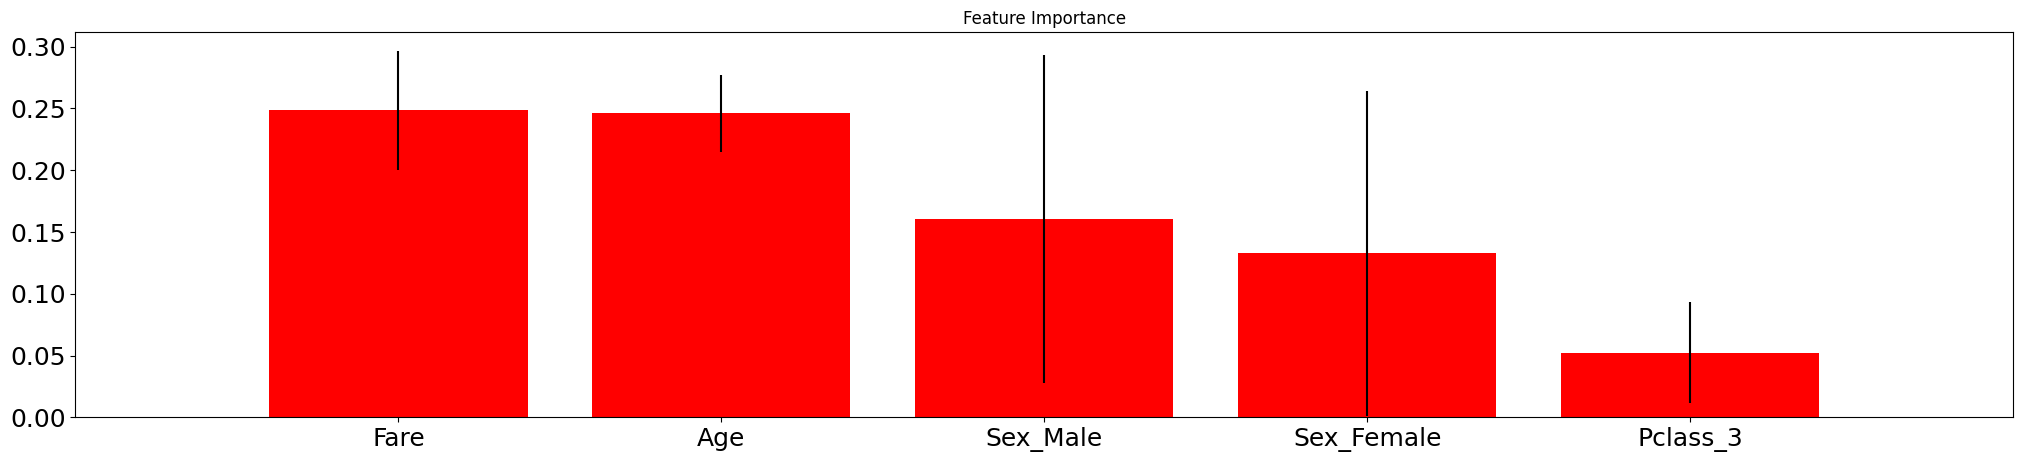

In [33]:
skplt.estimators.plot_feature_importances(rf, feature_names=titanic_baseline.columns[1:],figsize = (25,5),max_num_features=5,text_fontsize=18)
plt.show()

2. random forest classification with custom parameters

- play with max_depth, max_leaf_nodes, and max_features to decrease overfitting

In [34]:
from sklearn.model_selection import GridSearchCV

- max_depth (depth of decision trees)

In [35]:
# find best value for max_depth
param = {'max_depth': [1,6,7,8,10,None]}   # different possible values for max depth

rf0 = RandomForestClassifier(random_state = 1)
rf = GridSearchCV(rf0, param, scoring = 'accuracy', cv = 5)  # performs grid search over the parameters with 5 fold cross validation to find best value
rf.fit(X_train, y_train)

cv_1 = rf.best_score_

rf.best_params_

{'max_depth': 6}

In [36]:
# use best value for max_depth
rf_1 = RandomForestClassifier(random_state = 1, max_depth = 6, oob_score = True)
rf_1.fit(X_train, y_train)       # train rf using training set

y_pred = rf_1.predict(X_test)    # predict y using test set
accuracy_1 = accuracy_score(y_test, y_pred)
oob_1 = rf_1.oob_score_

accuracy_list.append(accuracy_1)
cv_list.append(cv_1)
oob_list.append(oob_1)

- max_leaf_nodes (No. of leaf nodes)

In [37]:
# find best value for max_leaf_nodes
param = {'max_leaf_nodes': [10,20,30,50, None]}

rf0 = RandomForestClassifier(random_state = 1)
rf = GridSearchCV(rf0, param, scoring = 'accuracy', cv=5)
rf.fit(X_train, y_train)

cv_2 = rf.best_score_

rf.best_params_

{'max_leaf_nodes': 20}

In [38]:
# use best value for max_leaf_nodes
rf_2 = RandomForestClassifier(random_state = 1, max_leaf_nodes = 20, oob_score = True)
rf_2.fit(X_train, y_train)

y_pred = rf_2.predict(X_test)    # predict y using test set
accuracy_2 = accuracy_score(y_test, y_pred)
oob_2 = rf_2.oob_score_

accuracy_list.append(accuracy_2)
cv_list.append(cv_2)
oob_list.append(oob_2)

- max_features (No. of features considered for splitting at each node)

In [39]:
# find best value for max_features
param = {'max_features': [1, 5, 6, 11, 12, 13, 22]}

rf0 = RandomForestClassifier(random_state = 1)
rf = GridSearchCV(rf0, param, scoring = 'accuracy', cv=5)
rf.fit(X_train, y_train)

cv_3 = rf.best_score_

rf.best_params_

{'max_features': 6}

In [40]:
# use best value for max_features
rf_3 = RandomForestClassifier(random_state = 1, max_features = 6, oob_score = True)
rf_3.fit(X_train, y_train)

y_pred = rf_3.predict(X_test)    # predict y using test set
accuracy_3 = accuracy_score(y_test, y_pred)
oob_3 = rf_3.oob_score_

accuracy_list.append(accuracy_3)
cv_list.append(cv_3)
oob_list.append(oob_3)

- Mixed of all 3 (max_depth, max_leaf_nodes, max_features)

In [16]:
# find best values for max_depth, max_leaf_nodes, max_features
param = {'max_depth': [1,6,7,8,10,None],
         'max_leaf_nodes': [10,20,30,50, None],
         'max_features': [1, 5, 6, 11, 12, 13, 22]}

rf0 = RandomForestClassifier(random_state = 1)
rf = GridSearchCV(rf0, param, scoring = 'accuracy', cv=5)
rf.fit(X_train, y_train)

cv_4 = rf.best_score_

rf.best_params_

{'max_depth': 6, 'max_features': 5, 'max_leaf_nodes': 20}

In [41]:
# use best values for max_depth, max_leaf_nodes, max_features
rf_4 = RandomForestClassifier(random_state = 1, max_depth= 6, max_features = 5, max_leaf_nodes = 20, oob_score = True)
rf_4.fit(X_train, y_train)

y_pred = rf_4.predict(X_test)    # predict y using test set
accuracy_4 = accuracy_score(y_test, y_pred)
oob_4 = rf_4.oob_score_

accuracy_list.append(accuracy_4)
cv_list.append(cv_4)
oob_list.append(oob_4)

In [42]:
df=pd.DataFrame(np.stack((accuracy_list, cv_list, oob_list), axis=1),
             columns = ['Accuracy', 'CV Score', 'OOB Score'],
             index = ['Baseline', 'Max Depth = 6', 'Max Leaf Node = 20', 'Max Features = 6', 'Mixed (all 3)'])

df=df.round(3)
df

,Accuracy,CV Score,OOB Score
Baseline,0.821,0.802,0.799
Max Depth = 6,0.816,0.823,0.822
Max Leaf Node = 20,0.816,0.824,0.830
Max Features = 6,0.832,0.802,0.796
Mixed (all 3),0.810,0.836,0.829
